# Employee Retention Prediction

> Managers tend to blame their turnover problems on everything under the sun, while ignoring the crux of the matter: people don't leave jobs; they leave managers. -- by Travis BradBerry


## Understand the problem statement and  business case

Recruiting and retaining the right employees is a challenging task that requires capital, time and expertise[1](https://toggl.com/blog/cost-of-hiring-an-employee):

* An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed. 
* Hiring a new employee in SME costs an average of \\$4100 with around 52 days to fill  a position.
* It costs around \\$300 per month to advertise a single job position on one of the major job boards out there.

You work as a data scientist at a multinational corporation. The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are most likely to leave the company.  

The goal of this notebook is to develop a model that could forecast which employees are most likely to leave the company, so that HR's and/or managers can take meaningful actions to avoid such an outcome. 

## Get to know your data

Before we get into deep visualizations, we want to understand our data and get a general overview of it.  
Questions we would to answer at this stage:

1. How many features and observations are there?
2. The structure of the data
3. The different datatypes we are going to deal with.
4. Distribution and Five number summary
5. ...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

In [2]:
df = pd.read_csv('data/HR-Employee-Attrition.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1907,...,4,80,0,5,3,3,4,2,1,0
948,30,No,Travel_Rarely,634,Research & Development,17,4,Medical,1,1321,...,4,80,2,9,2,3,9,1,0,8
903,29,No,Travel_Rarely,1329,Research & Development,7,3,Life Sciences,1,1260,...,2,80,2,6,2,3,6,0,1,0
267,25,No,Non-Travel,675,Research & Development,5,2,Life Sciences,1,369,...,4,80,2,6,2,3,6,3,1,5
713,45,No,Travel_Rarely,974,Research & Development,1,4,Medical,1,996,...,4,80,2,8,2,3,5,3,0,2


In [3]:
# data structure
print(f'Number of features : {df.shape[1]} (target included)')
print(f'Number of observations: {df.shape[0]}')

Number of features : 35 (target included)
Number of observations: 1470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
# Null values
np.sum(df.isnull())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [48]:
cat = df.select_dtypes(include='object').columns
for col in cat:
    print(f'* Unique values in column "{col}":')
    print(df[col].value_counts())
    print('----------------')

* Unique values in column "Attrition":
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------
* Unique values in column "BusinessTravel":
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------
* Unique values in column "Department":
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------
* Unique values in column "EducationField":
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------
* Unique values in column "Gender":
Male      882
Female    588
Name: Gender, dtype: int64
----------------
* Unique values in column "JobRole":
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representa

Convert objects to categories. In doing so, we reduce the memory usage of the dataset and simplifies further processing.

In [49]:
df[cat] = df[cat].astype('category')

In [51]:
df.describe(include='category').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Now we separate the target from the data. We drop the useless features and reassign the target.

In [52]:
# target
data = df.drop(columns=['Attrition', 'StandardHours', 'Over18', 'EmployeeCount'])
target = df[['Attrition']].copy()
target.replace(to_replace={'Yes':1, 'No':0}, inplace=True)

Our brain is so good at detecting patterns. It is therefore recommended to split the input data into test and train data from the beginning and before starting any kind of data analysis.  
We are going, however, to ignore this rule, since we don't have enough observations to afford such a thing.

### Distribution of the target

An important aspect in this first stage is to understand the distribution of our data, specifically the distribution of the label. 

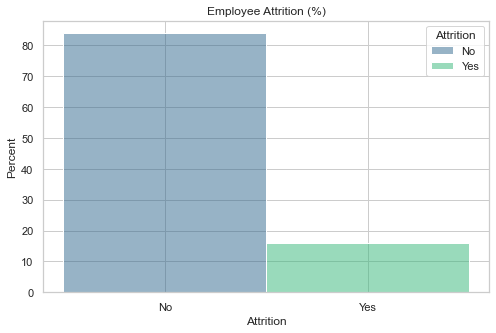

In [53]:
sns.set(context='notebook', style='whitegrid',
       rc={'figure.figsize':(8, 5)})
sns.histplot(data=df, x='Attrition', stat='percent', hue='Attrition', 
             palette='viridis')
plt.title('Employee Attrition (%)');

We are obviously dealing with an imbalanced dataset. **84\%** of employees did not leave the company, while 'only' **16
\%** did. Not all models can deal with such data, so this info will help us later determine what will be the best approach to implement our predictive model. 

### Gender Analysis

In this section we will see if there are any discrepancies (aka discrimination) between males and females. Somehow the HR-department forgot to also include ethnicity in its data, anyways...

Text(0.5, 1.0, 'Age Distribution')

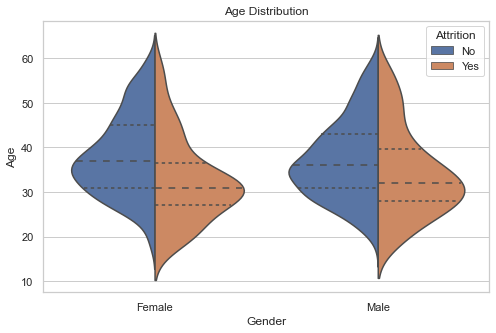

In [71]:
sns.violinplot(data=df, y='Age', x='Gender', 
               split=True, hue='Attrition', inner='quartile');
plt.title('Age Distribution')